# Job Posts Analysis

In this project, we will be analyzing job posts data to gain insights into the job market of tech-industry, specially the Syrian Mjob market. We will be focusing on identifying patterns and trends in job titles, skills required, and industries. By performing this analysis, we hope to gain a better understanding of the job market. We will be using a variety of data science techniques such as data cleaning, data visualization, and statistical analysis to extract meaningful insights from the data. Additionally, we will be using Computer Vision techniques like OCR to extract text from image job posts, also, we will use natural language processing (NLP) techniques to analyze the text in the job posts. The goal of this project is to provide valuable insights that can assist job seekers and employers in their job search and hiring process. <br>

This project is divided into multiple parts: 
01. Data Understanding 
02. Data Cleaning


## 01 Data Understanding

In this notebook, we will check out the data, understand its structure, take a look at the columns, and finally convert it into a more convenient form suitable for further analysis.


In [1]:
import pandas as pd
import numpy as np
import re


In [2]:
# Reading Data
data = pd.read_json("../data/result.json")


In [3]:
data.head()


,name,type,id,messages
0,تواصل,public_channel,1357097719,"{'id': 1567, 'type': 'message', 'date': '2022-..."
1,تواصل,public_channel,1357097719,"{'id': 1568, 'type': 'message', 'date': '2022-..."
2,تواصل,public_channel,1357097719,"{'id': 1569, 'type': 'message', 'date': '2022-..."
3,تواصل,public_channel,1357097719,"{'id': 1570, 'type': 'message', 'date': '2022-..."
4,تواصل,public_channel,1357097719,"{'id': 1571, 'type': 'message', 'date': '2022-..."


as we can see, our main data is contained in the messages column, it's also embeded as json inside the column


In [4]:
messages = data.messages.to_json()
messages = pd.read_json(messages).T
messages.head()


,id,type,date,date_unixtime,from,from_id,photo,width,height,text,text_entities,edited,edited_unixtime,file,thumbnail,mime_type,media_type,duration_seconds,forwarded_from
0,1567,message,2022-01-02T13:46:28,1641123988,تواصل,channel1357097719,photos/photo_1205@02-01-2022_13-46-28.jpg,800,419,"[Job Title:, {'type': 'hashtag', 'text': '#sen...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1568,message,2022-01-03T11:09:36,1641200976,تواصل,channel1357097719,photos/photo_1206@03-01-2022_11-09-36.jpg,1110,1124,"[Job Title:, {'type': 'hashtag', 'text': '#cas...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1569,message,2022-01-03T14:28:11,1641212891,تواصل,channel1357097719,photos/photo_1207@03-01-2022_14-28-11.jpg,1280,1267,"[Company: , {'type': 'hashtag', 'text': '#Nati...","[{'type': 'plain', 'text': 'Company: '}, {'typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,message,2022-01-03T17:12:13,1641222733,تواصل,channel1357097719,photos/photo_1208@03-01-2022_17-12-13.jpg,1014,1124,"[Job title: , {'type': 'hashtag', 'text': '#Em...","[{'type': 'plain', 'text': 'Job title: '}, {'t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1571,message,2022-01-03T19:16:11,1641230171,تواصل,channel1357097719,photos/photo_1209@03-01-2022_19-16-11.jpg,1062,1125,"[{'type': 'link', 'text': 'https://www.faceboo...","[{'type': 'link', 'text': 'https://www.faceboo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


each row represents a unique message in the channel <br>
Columns explanation:

- **id**: message id
- **type**: message, poll, etc.
- **date**: the date and time that the message was sent on.
- **date_unixtime**: time stamp of the previous column.
- **from**: user name who sent the message.
- **from_id**: id of the user who sent the message.
- **photo**: photo path to the related image.
- **width, height**: widht and height of the photo.
- **text**: message's text.
- **text_entities**: message's text as entities.
- **edited**: date of editing the message (if it was edited).
- **edited_unixtime**: timestamp of editing message.
- **file**: file path if the message was a file.
- **thumbnail**: thumbnail path if it contains a thumbnail.
- **mime_type**: file type (like if an image was sent as a file).
- **media_type**: media file type.
- **duration_seconds**: video duration in seconds (if message was a video).
- **forwarded_from**: user name that the message was forwarded from.


In [5]:
messages.shape


(923, 19)

In [6]:
messages.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 0 to 922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                923 non-null    object
 1   type              923 non-null    object
 2   date              923 non-null    object
 3   date_unixtime     923 non-null    object
 4   from              923 non-null    object
 5   from_id           923 non-null    object
 6   photo             726 non-null    object
 7   width             758 non-null    object
 8   height            758 non-null    object
 9   text              923 non-null    object
 10  text_entities     923 non-null    object
 11  edited            131 non-null    object
 12  edited_unixtime   131 non-null    object
 13  file              32 non-null     object
 14  thumbnail         32 non-null     object
 15  mime_type         32 non-null     object
 16  media_type        1 non-null      object
 17  duration_seconds

In [7]:
messages.describe(include="O")


,id,type,date,date_unixtime,from,from_id,photo,width,height,text,text_entities,edited,edited_unixtime,file,thumbnail,mime_type,media_type,duration_seconds,forwarded_from
count,923,923,923,923,923,923,726,758,758,923,923,131,131,32,32,32,1,1,4
unique,923,1,892,892,1,1,692,201,195,683,683,131,131,1,1,3,1,1,1
top,1567,message,2022-11-16T11:40:21,1668591621,تواصل,channel1357097719,photos/photo_1649@23-07-2022_16-18-54.jpg,720,1280,,[],2022-01-11T16:38:33,1641911913,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,image/jpeg,video_file,8,تواصل
freq,1,923,8,8,923,923,4,134,166,169,169,1,1,32,32,28,1,1,4


### Initial Data Cleaning

we will preform some minor cleaning processes, to restructure the data and remove unwanted parts.


In [8]:
messages.type.unique()


array(['message'], dtype=object)

In [9]:
messages["from"].unique()


array(['تواصل'], dtype=object)

In [10]:
messages["from_id"].unique()


array(['channel1357097719'], dtype=object)

the following columns: _type_, _from_, _from_id_ have only one value each, <br>
that make sense, as the data was extracted from a public channel and only admin can send messages, so _from_ and _from_id_ values will always be the same.<br>
these columns are not useful for our analysis so we will drop them.


In [11]:
messages.drop(columns=["type", "from", "from_id"], inplace=True)


also, the following columns do not contain any useful information for our analysis purpose, so we will drop them. <br>

_date_unixtime, edited, edited_unixtime, file, thumbnail, mime_type, media_type, duration_seconds, forwarded_from_


In [12]:
messages.drop(
    columns=[
        "date_unixtime",
        "edited",
        "edited_unixtime",
        "file",
        "thumbnail",
        "mime_type",
        "media_type",
        "duration_seconds",
        "forwarded_from",
    ],
    inplace=True,
)


For our analysis, we will be looking at the job market during 2022, so we will keep the messages of the year 2022 only


In [13]:
# keep only job posts that was published between 1-1-2022 and 31-1-2023
messages = messages.loc[
    (messages.date < "2023-01-01") & (messages.date >= "2022-01-01")
]


### Creating Raw Text column

create a **raw_text** column that contains the message text as a raw string


In [14]:
def convert_to_raw_text(text_entities):
    raw_text = ""
    for item in text_entities:
        raw_text += item["text"]
    return raw_text


In [15]:
raw_text_messages = messages.text_entities.apply(convert_to_raw_text)


In [16]:
raw_text_messages


0      Job Title:#senior and a junior #developer\n \n...
1      Job Title:#cashier\nJob Type: #full_time\n \nش...
2      Company: #National_Technology_Group #NTG)\nJob...
3      Job title: #Employees for Operations Departmen...
4      https://www.facebook.com/384708578676644/posts...
                             ...                        
887    مرحباً جميعاً \nبدء استقبال الطلبات لمنحة #الل...
888    🔵Job Title: #React JS Developer\nJob location:...
889                                                     
890    🧩Company: #YouTube group \nJob title: #YouTube...
891    ورشة عمل مجانية في إنترنت الأشياء\n\nبالتعاون ...
Name: text_entities, Length: 892, dtype: object

In [17]:
messages["raw_text"] = raw_text_messages


In [18]:
# Looking at a random text from messages
print(raw_text_messages[np.random.randint(0, len(raw_text_messages) - 1)].split("\n"))


['https://www.facebook.com/384708578676644/posts/1345229965957829/']


In [19]:
messages.loc[messages.text == ""]


,id,date,photo,width,height,text,text_entities,raw_text
464,2035,2022-07-27T18:25:45,photos/photo_1662@27-07-2022_18-25-45.jpg,720,754,,[],
467,2038,2022-07-28T13:17:15,photos/photo_1664@28-07-2022_13-17-15.jpg,798,999,,[],
469,2040,2022-07-28T15:13:50,photos/photo_1665@28-07-2022_15-13-50.jpg,785,955,,[],
471,2042,2022-07-30T18:09:13,photos/photo_1666@30-07-2022_18-09-13.jpg,905,1280,,[],
474,2045,2022-07-31T20:53:46,photos/photo_1667@31-07-2022_20-53-46.jpg,1080,970,,[],
...,...,...,...,...,...,...,...,...
875,2456,2022-12-22T12:52:32,photos/photo_1904@22-12-2022_12-52-32.jpg,1192,1280,,[],
879,2460,2022-12-23T18:59:48,photos/photo_1906@23-12-2022_18-59-48.jpg,1231,1272,,[],
883,2464,2022-12-23T22:41:35,photos/photo_1907@23-12-2022_22-41-35.jpg,1080,608,,[],
885,2467,2022-12-26T13:46:01,photos/photo_1909@26-12-2022_13-46-01.jpg,1280,1069,,[],


there are 160 messages that don't contain text, probably it's an image message. <br>
we will keep these messages for now, as they may contain useful information in their corresponding photo.


## Seperating Job Post messages from others

messages do not always contain a job post info, it may contain an image only, or a link, or it may be empty


we will assume the following:

- if a message contain any of the following keywords _job title_ _company_ _job type_ _job location_ then it's a job post
- otherwise, we will assume (just for now) that this message is a non-job post message
- we will divide text messages into categories, `job_post`, `link`, `empty`, and `others`


In [20]:
eng_keywords = [
    "job title",
    "job location",
    "job type",
    "company",
    "job_title",
    "title",
]
arabic_keywords = ["فرصة_تدريب", "فرصة_توظيف", "فرصة_عمل"]
job_post_keywords = eng_keywords + arabic_keywords

job_post = messages.raw_text.apply(
    lambda text: True if any(x in text.lower() for x in job_post_keywords) else False
)


In [21]:
job_post.sum(), job_post.sum() / messages.shape[0] * 100


(535, 59.97757847533632)

535 (59%) of messages contains previous keywords <br>
let's investigate other messages


let's gradually build our job posts


In [22]:
non_job_posts = ~job_post
non_job_posts.sum()


357

In [23]:
empty_message = messages.raw_text == ""
empty_message.sum()


160

In [24]:
url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
only_links = messages.raw_text.apply(
    lambda text: True if re.match(url_regex, text) else False
)
only_links.sum()


164

In [25]:
messages["type"] = np.nan
messages.loc[job_post, "type"] = "job_post"
messages.loc[empty_message, "type"] = "empty"
messages.loc[only_links, "type"] = "link"
messages["type"].fillna("others", inplace=True)


In [26]:
messages["type"].value_counts()


job_post    535
link        164
empty       160
others       33
Name: type, dtype: int64

In [27]:
messages.head()


,id,date,photo,width,height,text,text_entities,raw_text,type
0,1567,2022-01-02T13:46:28,photos/photo_1205@02-01-2022_13-46-28.jpg,800,419,"[Job Title:, {'type': 'hashtag', 'text': '#sen...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#senior and a junior #developer\n \n...,job_post
1,1568,2022-01-03T11:09:36,photos/photo_1206@03-01-2022_11-09-36.jpg,1110,1124,"[Job Title:, {'type': 'hashtag', 'text': '#cas...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",Job Title:#cashier\nJob Type: #full_time\n \nش...,job_post
2,1569,2022-01-03T14:28:11,photos/photo_1207@03-01-2022_14-28-11.jpg,1280,1267,"[Company: , {'type': 'hashtag', 'text': '#Nati...","[{'type': 'plain', 'text': 'Company: '}, {'typ...",Company: #National_Technology_Group #NTG)\nJob...,job_post
3,1570,2022-01-03T17:12:13,photos/photo_1208@03-01-2022_17-12-13.jpg,1014,1124,"[Job title: , {'type': 'hashtag', 'text': '#Em...","[{'type': 'plain', 'text': 'Job title: '}, {'t...",Job title: #Employees for Operations Departmen...,job_post
4,1571,2022-01-03T19:16:11,photos/photo_1209@03-01-2022_19-16-11.jpg,1062,1125,"[{'type': 'link', 'text': 'https://www.faceboo...","[{'type': 'link', 'text': 'https://www.faceboo...",https://www.facebook.com/384708578676644/posts...,link


## Check for duplicate job posts


In [28]:
dups = messages[messages.raw_text != ""].duplicated(subset="raw_text")


In [29]:
messages[(messages.raw_text != "") & dups].shape


(72, 9)

some job vacancies are posted multiple times <br>
it may be an indicator for a low hitrate of the company <br>
we will keep those duplicates for now, in order to perform some further analysis on them


In [30]:
messages.to_csv("../data/data_v1.csv", index=False)


## Creating WordCloud


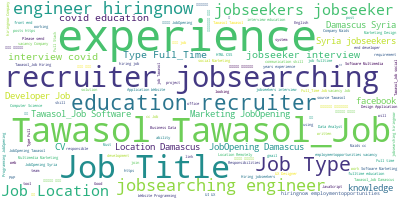

In [31]:
from wordcloud import WordCloud

long_string = ",".join(list(messages["raw_text"].values))


wordcloud = WordCloud(
    background_color="white", max_words=5000, contour_width=3, contour_color="steelblue"
)
wordcloud.generate(long_string)
wordcloud.to_image()


an overall view of the words in messages, the most significant keywords are related to job posts and recriuiting .
